## Распознаем собственные изображения

In [1]:
import pandas as pd
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras import optimizers
from keras.models import load_model
from keras.utils import np_utils

Using TensorFlow backend.


## Загружаем ранее обученную модель

In [2]:
import sys 
import os
sys.path.append(os.path.abspath("./models/"))

In [3]:
my_model = load_model('models/model-cnn2-e10-fitted.h5')

## Чтобы поразвлечься - загружаем и датасет

In [4]:
d_train = pd.read_csv('data/train.csv')

In [5]:
pixels = d_train.columns.drop('label')
y_column = 'label'

In [6]:
d_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Берем случайное изображение из train-выборки и посмотрим на него

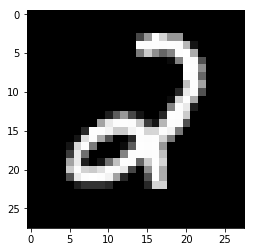

It is: [2]


In [7]:
rst = np.random.RandomState(4)
rand_idx = rst.randint(len(d_train))
rand_img = d_train[pixels].iloc[[rand_idx]].as_matrix()
rand_img = rand_img.reshape(28, 28)
plt.imshow(rand_img, cmap = plt.get_cmap('gray'))
plt.show()
pred = my_model.predict(rand_img.reshape(1, 28, 28, 1))
print('It is:', np.where(pred == 1)[1])

## Функция перевода RGB -> Gray

In [8]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114]).dot(255)

## Ищем все png-шки в директории и предсказываем их

In [9]:
def predictImagesInDir(directory, img_rows, img_cols, model):
    for file in os.listdir(directory):
        if file.endswith('.png'):
            img = mpimg.imread(directory + file)     
            gray_img = rgb2gray(img)   
            plt.imshow(gray_img, cmap = plt.get_cmap('gray'))
            plt.show()
            pred = model.predict(gray_img.reshape(1, img_rows, img_cols, 1))
            print('It is:', np.where(pred == 1)[1])

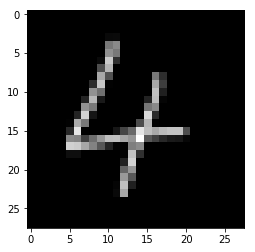

It is: [4]


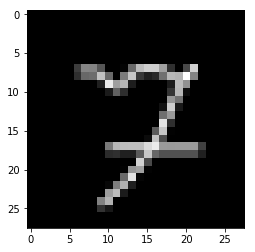

It is: [7]


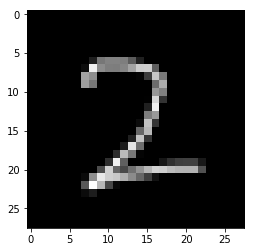

It is: [2]


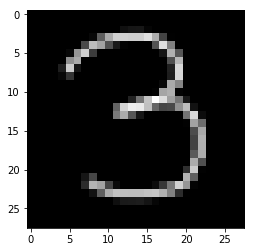

It is: [3]


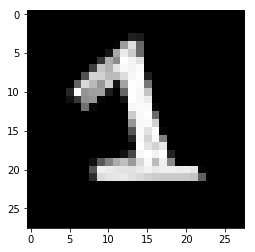

It is: [1]


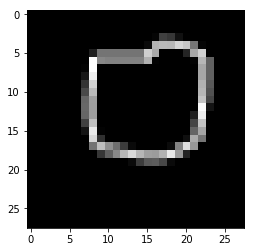

It is: [0]


In [10]:
predictImagesInDir('img/', 28, 28, my_model)